In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('/Users/izabellamartirosyan/Desktop/Customer-Segmentation-for-Mall/Mall_Customers_data.csv')

In [4]:
def categorical_gender(data):
    """If the gender column will be a categorical, the function will transform it into numerical.
    Returns the updated dataframe"""
    data['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
    return data
categorical_gender(data)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

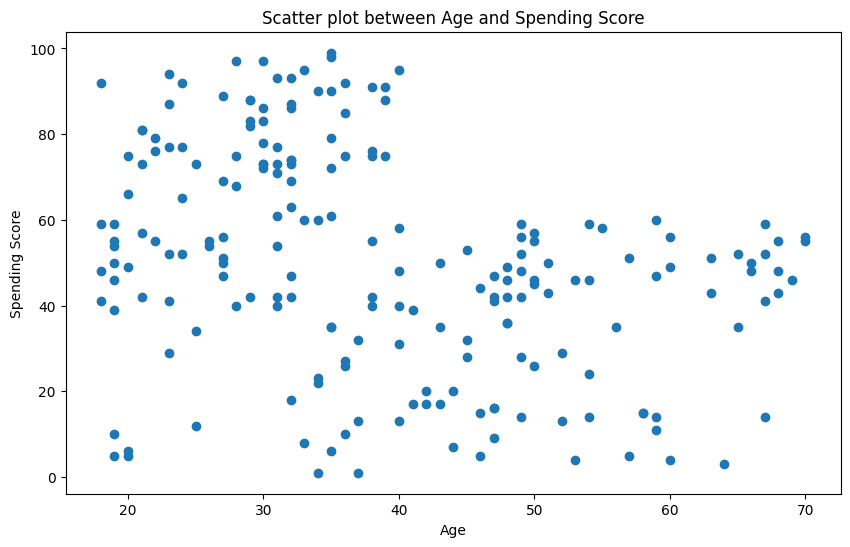

In [5]:
def age_vs_spending_score(data):
    """Creates a scatter plot between Age and Spending score of a customer
    returns a scatter plot
    """
    plt.figure(figsize=(10,6))
    plt.scatter(data['Age'],data['Spending Score (1-100)'], marker='o');
    plt.xlabel('Age')
    plt.ylabel('Spending Score')
    plt.title('Scatter plot between Age and Spending Score')
    return plt

age_vs_spending_score(data)

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

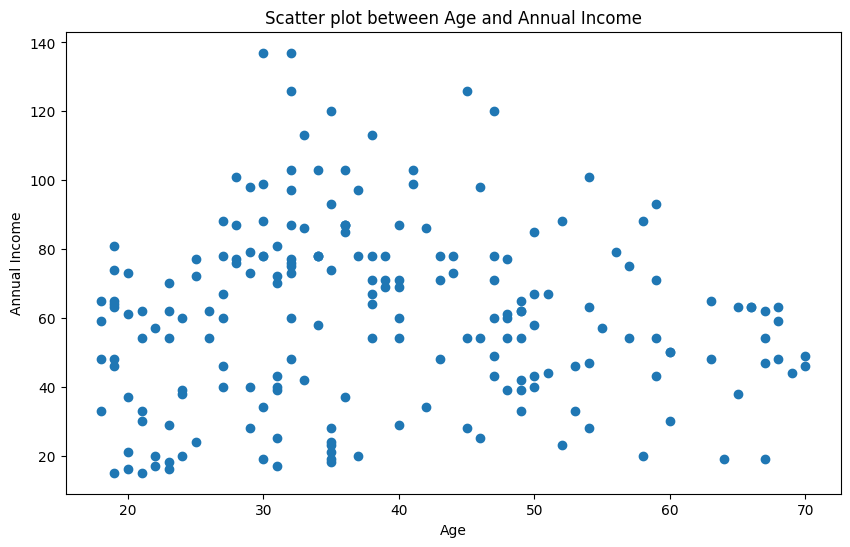

In [6]:
def age_vs_annualincome(data):
    """Creates a scatter plot between age and annual income
    returns a scatter plot
    """
    plt.figure(figsize=(10,6))
    plt.scatter(data['Age'],data['Annual Income (k$)'], marker='o');
    plt.xlabel('Age')
    plt.ylabel('Annual Income')
    plt.title('Scatter plot between Age and Annual Income')
    return plt

age_vs_annualincome(data)

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

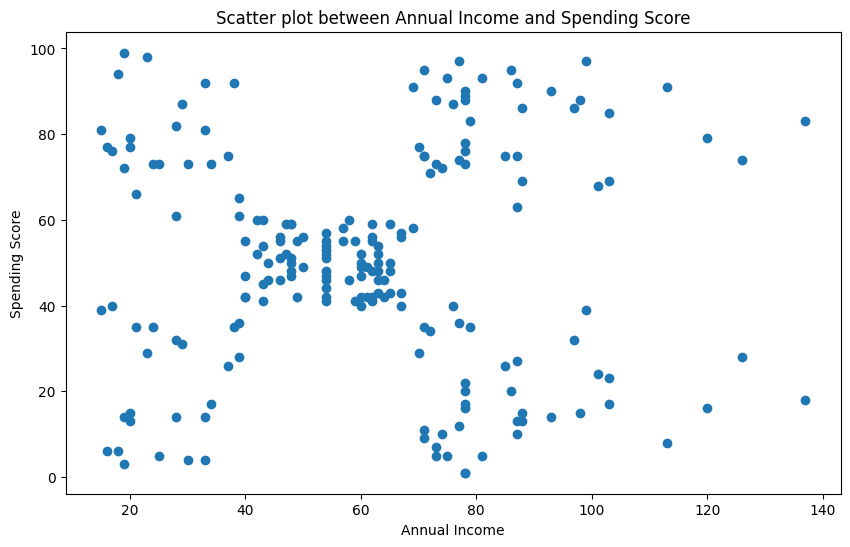

In [7]:
def annualincome_vs_spendingscore(data):
    """Creates a scatter plot between income and spending score
    Returns a scatter plot
    """
    plt.figure(figsize=(10,6))
    plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'], marker='o');
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.title('Scatter plot between Annual Income and Spending Score')
    return plt

annualincome_vs_spendingscore(data)

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

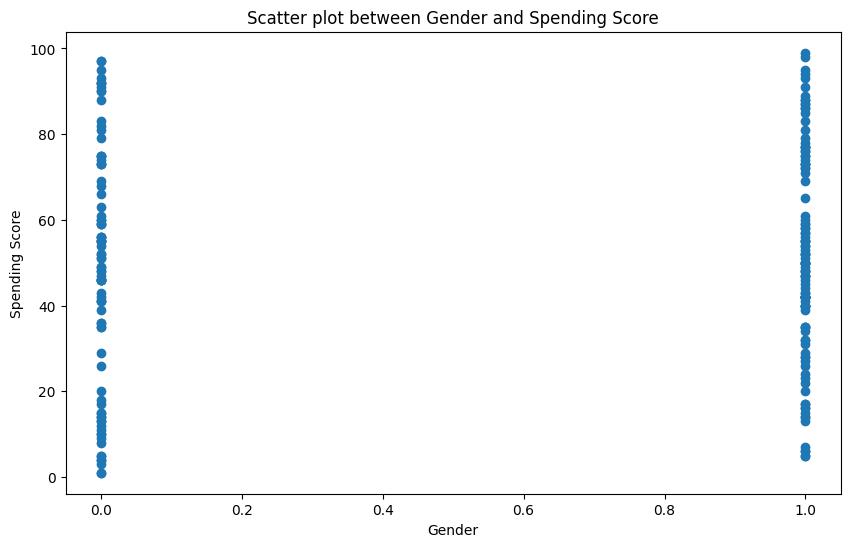

In [8]:
def gender_vs_spendingscore(data):
    """Creates a scatter plot between gender and spending score
    Returns a scatter plot
    """
    plt.figure(figsize=(10,6))
    plt.scatter(data['Gender'],data['Spending Score (1-100)'], marker='o');
    plt.xlabel('Gender')
    plt.ylabel('Spending Score')
    plt.title('Scatter plot between Gender and Spending Score')
    return plt

gender_vs_spendingscore(data)

<module 'seaborn' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/__init__.py'>

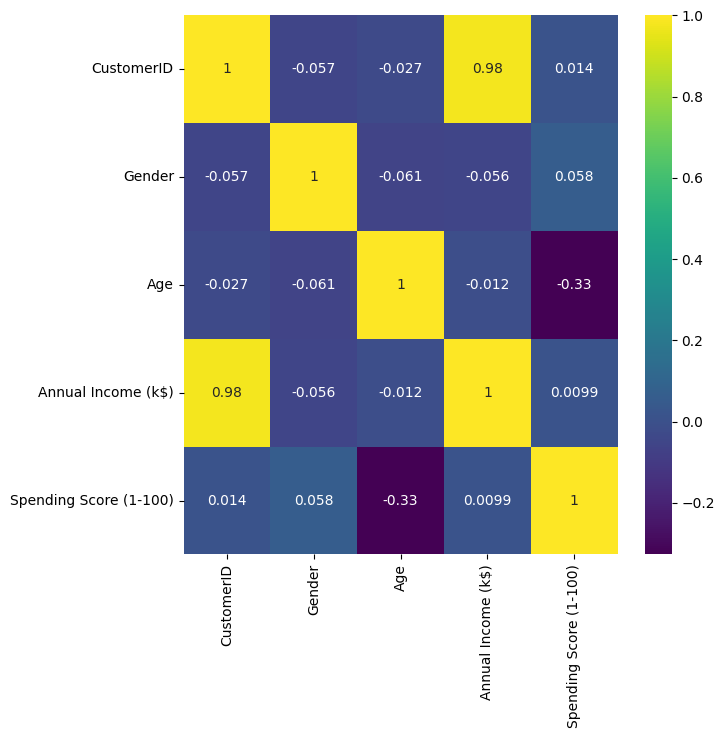

In [9]:
def corr(data):
    """Plots a correlation heatmap between variables
    Returns a correlation heatmap"""
    fig_dims = (7, 7)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.heatmap(data.corr(), annot=True, cmap='viridis')
    return sns

corr(data)

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

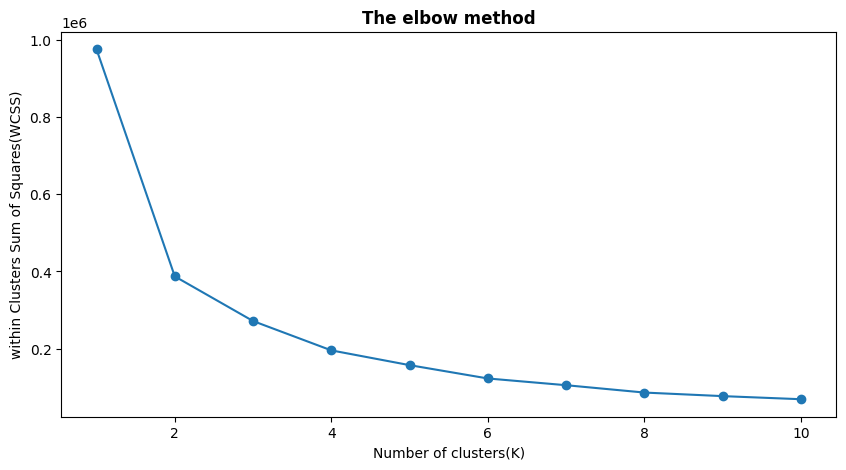

In [11]:
def elbow(data):
    """Returns optimal number of clusters data should be divided to
    Returns a plot"""
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++',
                        max_iter=300, n_init=10, random_state=42)
        x = data.copy()
        kmeans.fit(x)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)

    plt.figure(figsize=(10, 5))
    no_clusters = range(1, 11)
    plt.plot(no_clusters, wcss, marker="o")
    plt.title('The elbow method', fontweight="bold")
    plt.xlabel('Number of clusters(K)')
    plt.ylabel('within Clusters Sum of Squares(WCSS)')
    return plt
elbow(data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

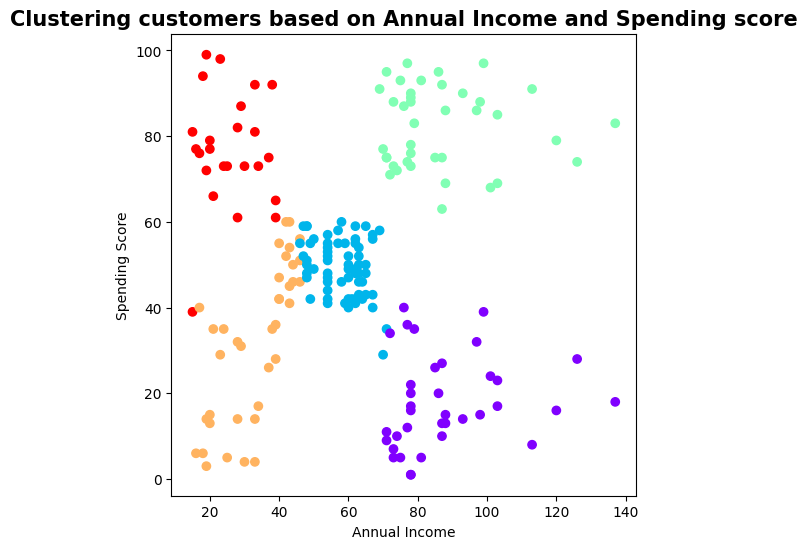

In [12]:
def clustering_new(data):
    """Returns mall customers divided to 5 clusters based on annual income and spending score
    Returns a scatter plot"""

    x = data.copy()
    kmeans_new = KMeans(5)
    kmeans_new.fit(x)

    clusters_new = x.copy()
    clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)
    gender= {0:'Male',1:'Female'}
    clusters_new['Gender']= clusters_new['Gender'].map(gender)
    plt.figure(figsize=(6,6))
    plt.scatter(clusters_new['Annual Income (k$)'],clusters_new['Spending Score (1-100)'],c=clusters_new['cluster_pred'],cmap='rainbow')
    plt.title("Clustering customers based on Annual Income and Spending score", fontsize=15,fontweight="bold")
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    return plt
clustering_new(data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<module 'seaborn' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/__init__.py'>

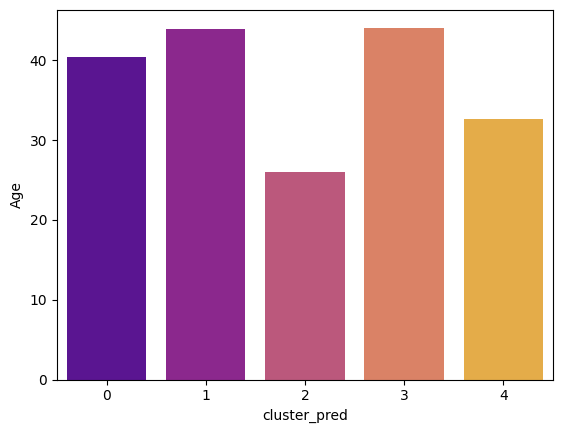

In [13]:
def barplot_age(data):
    """"Visualizes clusters based on age
    Returns a bar plot"""
    x = data.copy()
    kmeans_new = KMeans(5)
    kmeans_new.fit(x)
    clusters_new = x.copy()
    clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)
    avg_data = clusters_new.groupby(['cluster_pred'], as_index=False).mean()
    sns.barplot(x='cluster_pred',y='Age',palette="plasma",data=avg_data)
    return sns
barplot_age(data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<module 'seaborn' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/__init__.py'>

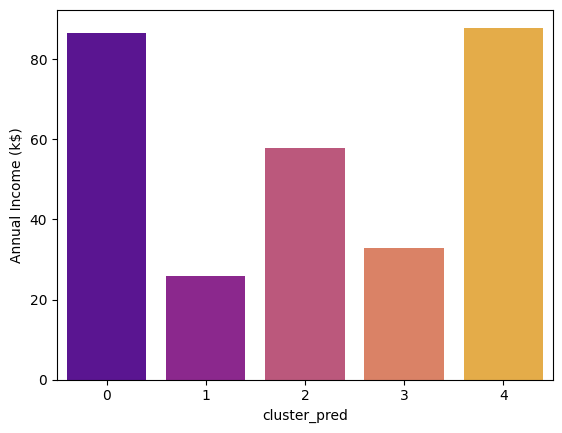

In [14]:
def barplot_annualincome(data):
    """"Visualizes clusters based on Annual Income
        Returns a bar plot"""
    x = data.copy()
    kmeans_new = KMeans(5)
    kmeans_new.fit(x)
    clusters_new = x.copy()
    clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)
    avg_data = clusters_new.groupby(['cluster_pred'], as_index=False).mean()
    sns.barplot(x='cluster_pred', y='Annual Income (k$)', palette="plasma", data=avg_data)
    return sns
barplot_annualincome(data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<module 'seaborn' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/__init__.py'>

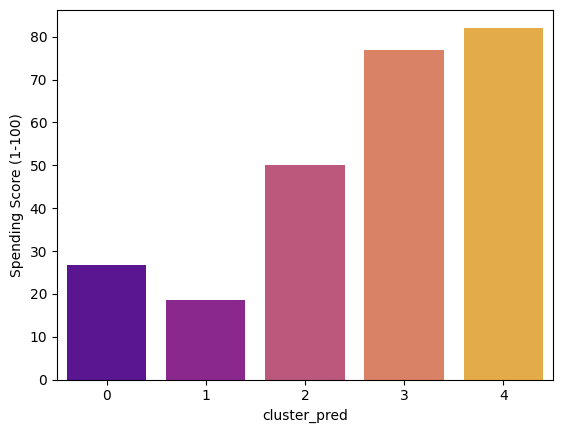

In [15]:
def barplot_spendingscore(data):
    """"Visualizes clusters based on Spending Scores
        Returns a bar plot"""
    x = data.copy()
    kmeans_new = KMeans(5)
    kmeans_new.fit(x)
    clusters_new = x.copy()
    clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)
    avg_data = clusters_new.groupby(['cluster_pred'], as_index=False).mean()
    sns.barplot(x='cluster_pred',y='Spending Score (1-100)',palette="plasma",data=avg_data)
    return sns
barplot_spendingscore(data)

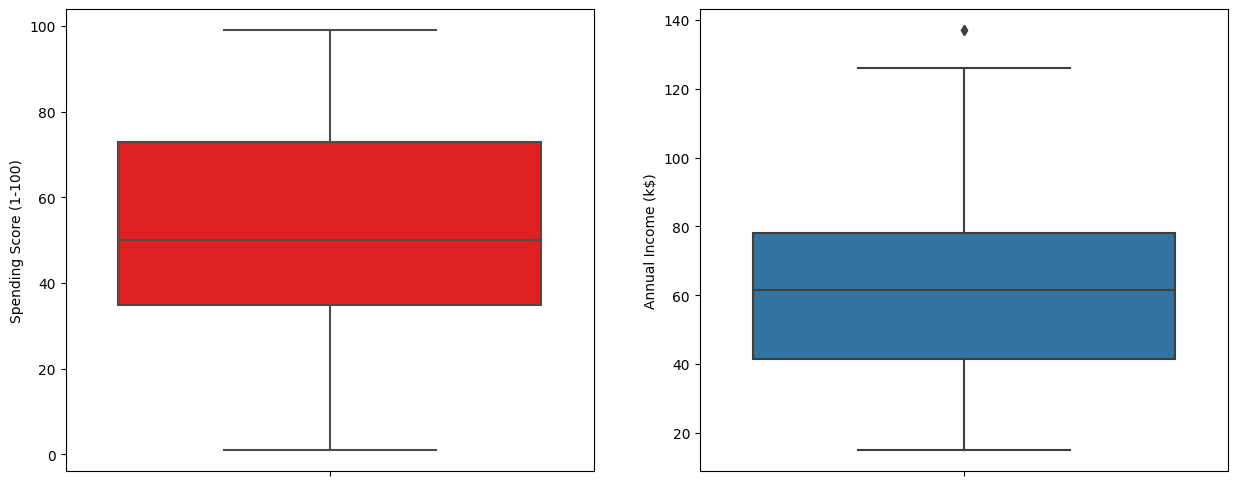

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=data["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=data["Annual Income (k$)"])
plt.show()

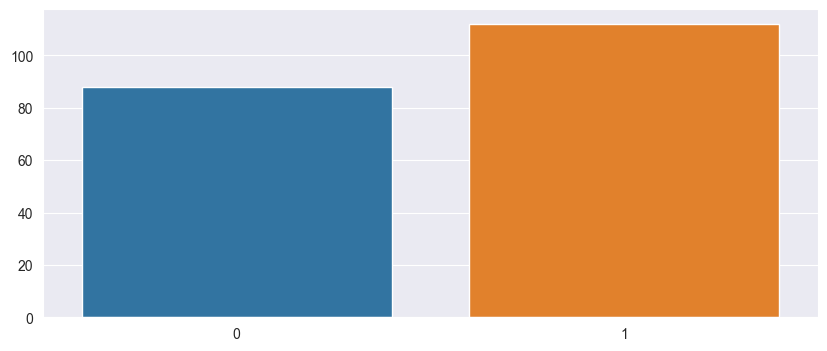

In [17]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

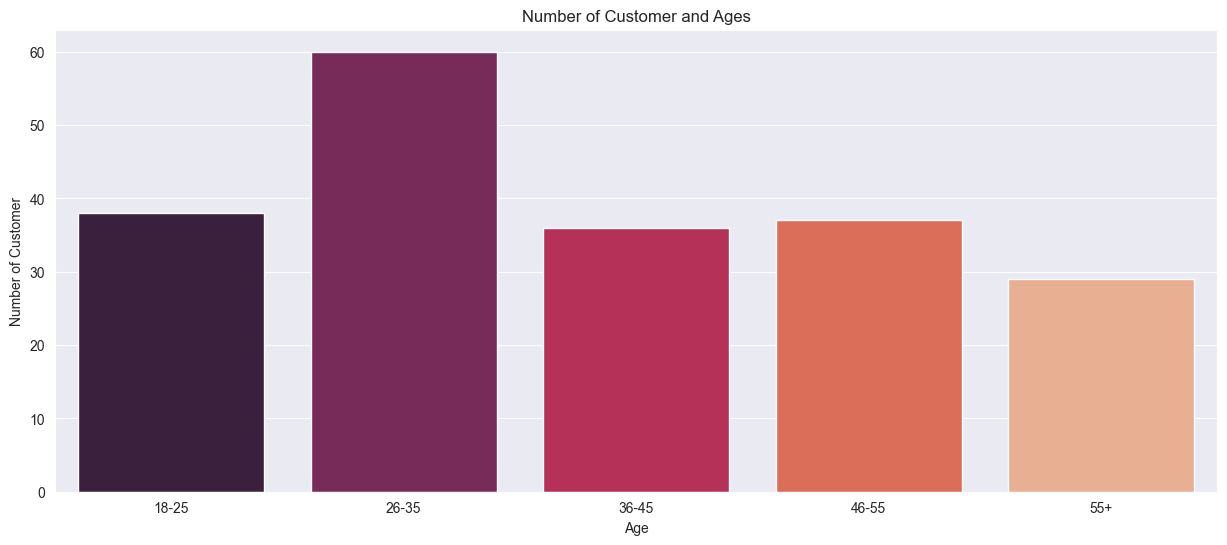

In [18]:
age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age55above = data.Age[data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),
len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

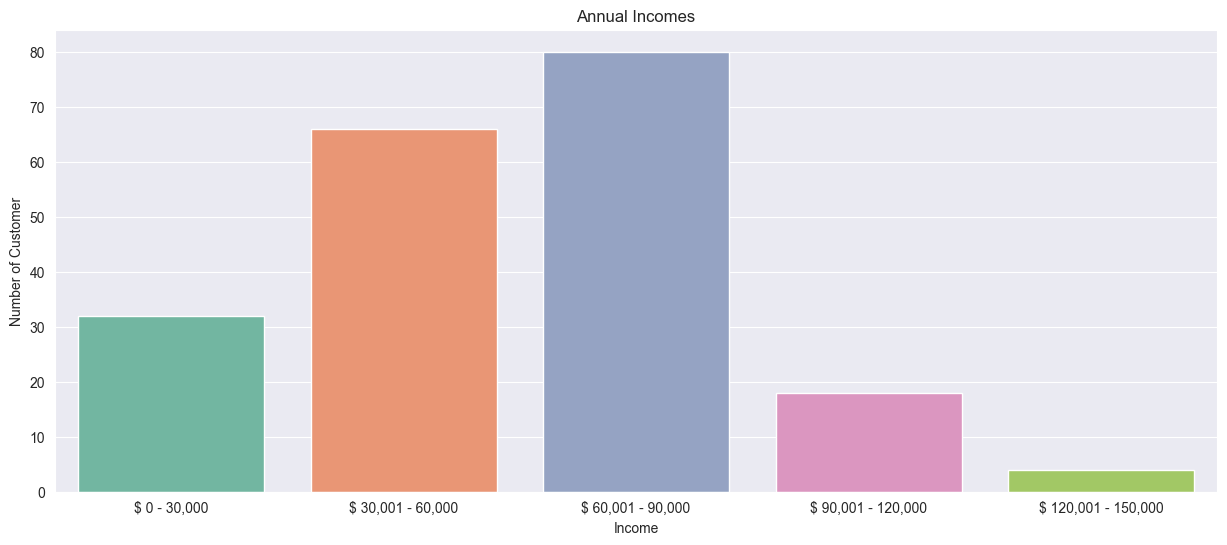

In [19]:
income0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
income31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
income61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
income91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
income121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

x1 = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
y1 = [len(income0_30.values), len(income31_60.values), len(income61_90.values), len(income91_120.values), len(income121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x1, y=y1, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [20]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(data.iloc[:,1:])
data["label"] = clusters

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

NameError: name 'df' is not defined

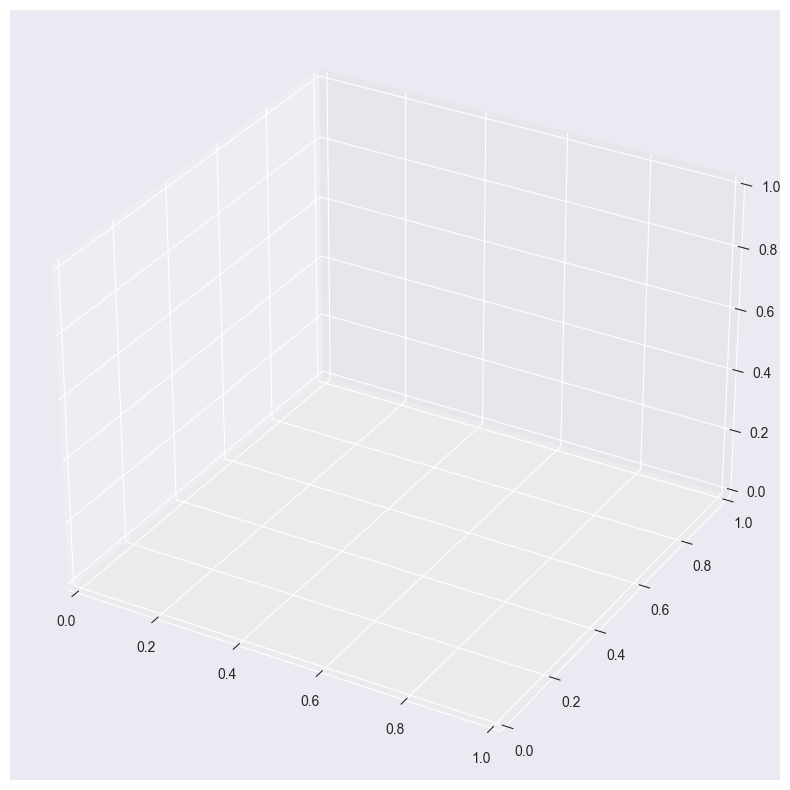

In [22]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60)
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()